In [1]:
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
import matplotlib.pylab as plt
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [2]:
IMAGE_SIZE = 16

composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])
target_composed = transforms.Compose([])

In [3]:
train = torchvision.datasets.FashionMNIST('./data', download=True, train= True, 
                                               transform=composed)
val = torchvision.datasets.FashionMNIST('./data', download=True, train= False,
                                             transform=composed)

In [4]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [5]:
train_data = []
train_target = []
val_data = []
val_target = []
for i in range(len(train)):
    train_data.append(np.array(train[i][0]))
    train_target.append(np.array(train[i][1]))

for i in range(len(val)):
    val_data.append(np.array(val[i][0]))
    val_target.append(np.array(val[i][1]))

In [6]:
train_data = np.array(train_data)
train_target = np.array(train_target)
val_data = np.array(val_data)
val_target = np.array(val_target)

batch_size = 64
torch_train_data = torch.from_numpy(train_data)
torch_train_target = torch.from_numpy(train_target)
torch_val_data = torch.from_numpy(val_data)
torch_val_target = torch.from_numpy(val_target)

train = torch.utils.data.TensorDataset(torch_train_data,torch_train_target)
test = torch.utils.data.TensorDataset(torch_val_data,torch_val_target)

train_loader = torch.utils.data.DataLoader(train, batch_size= batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size)

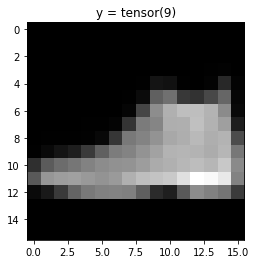

In [7]:
show_data(test[0])

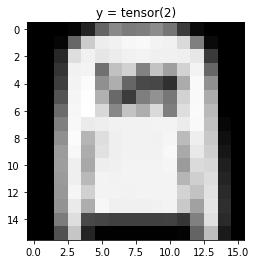

In [8]:
show_data(test[1])

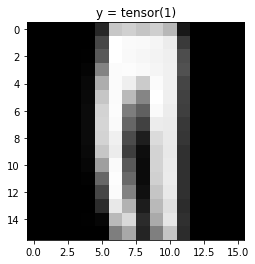

In [9]:
show_data(test[2])

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.relu = nn.ReLU()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.norm1 = nn.BatchNorm2d(32)
    
        self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.norm2 = nn.BatchNorm2d(64)
        
        
        self.li1 = nn.Linear(5 * 5 * 64, 64)
        self.li2 = nn.Linear(64, 10)
        
    def forward(self, x):

        x = self.norm1(self.relu(self.conv1(x)))

        x = self.maxpool(x)

        x = self.norm2(self.relu(self.conv2(x)))

        x = x.view(-1, 5* 5 * 64)
        x = self.relu(self.li1(x))
        x = self.li2(x)
        
        return x
        
        

In [11]:
slf = Net()
print(slf)

Net(
  (relu): ReLU()
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (li1): Linear(in_features=1600, out_features=64, bias=True)
  (li2): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
def train(model, data_train, data_val, epoh, loss, optim):
    model.train()

    for j in range(epoh):
        count = .0
        correct = .0
        print("TRAIN")
        print('-'*20)
        for i, dataset in enumerate(data_train):
            
            x, y = dataset
            optim.zero_grad()
            out = model(x)
            er = loss(out, y)
            count += er
            er.backward()
            optim.step()
            
            
            pred = torch.max(out, 1)[1]
            correct += (pred == y).sum()

            if i % 50 == 0:
                print('Epohe : {} [{}/{}], loss = {:.6f}, accuracy = {:.3f}'.format(j, len(y) * (i), 
                                    len(data_train.dataset), er, correct/ (len(y) * (i + 1))))

        cost_train.append(er)
        accur_train.append(correct/ len(data_train.dataset))
        
        total_correct = .0
        total_er = .0
        for x,y in data_val:
                      
            optim.zero_grad()
            out = model(x)
            total_er += loss(out, y)
            pred = torch.max(out, 1)[1]
            total_correct += (pred == y).sum()
            
        cost_val.append(total_er)
        accur_val.append(total_correct/ len(data_val.dataset))
        print()
        print('VAL')
        print('Epohe : {} [{}/{}], loss = {:.6f}, accuracy = {:.3f}'.format(j, len(data_val.dataset) , 
                                    len(data_train.dataset), total_er, total_correct/len(data_val.dataset)))
        print()

In [13]:
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(slf.parameters(), lr = 0.01, momentum=0.4)

In [14]:
cost_train = []
cost_val = []
accur_train = []
accur_val = []
train(slf, train_loader, test_loader, 7, Loss, optimizer)

TRAIN
--------------------
Epohe : 0 [0/60000], loss = 2.290825, accuracy = 0.109
Epohe : 0 [3200/60000], loss = 0.817894, accuracy = 0.627
Epohe : 0 [6400/60000], loss = 0.628301, accuracy = 0.695
Epohe : 0 [9600/60000], loss = 0.711516, accuracy = 0.721
Epohe : 0 [12800/60000], loss = 0.392993, accuracy = 0.744
Epohe : 0 [16000/60000], loss = 0.629111, accuracy = 0.758
Epohe : 0 [19200/60000], loss = 0.495713, accuracy = 0.769
Epohe : 0 [22400/60000], loss = 0.268803, accuracy = 0.779
Epohe : 0 [25600/60000], loss = 0.457575, accuracy = 0.787
Epohe : 0 [28800/60000], loss = 0.495582, accuracy = 0.794
Epohe : 0 [32000/60000], loss = 0.435336, accuracy = 0.800
Epohe : 0 [35200/60000], loss = 0.319883, accuracy = 0.806
Epohe : 0 [38400/60000], loss = 0.338861, accuracy = 0.811
Epohe : 0 [41600/60000], loss = 0.402261, accuracy = 0.815
Epohe : 0 [44800/60000], loss = 0.524536, accuracy = 0.818
Epohe : 0 [48000/60000], loss = 0.354174, accuracy = 0.821
Epohe : 0 [51200/60000], loss = 0.45

Epohe : 6 [51200/60000], loss = 0.236146, accuracy = 0.921
Epohe : 6 [54400/60000], loss = 0.226658, accuracy = 0.921
Epohe : 6 [57600/60000], loss = 0.196448, accuracy = 0.921

VAL
Epohe : 6 [10000/60000], loss = 44.764244, accuracy = 0.898



VALIDATION


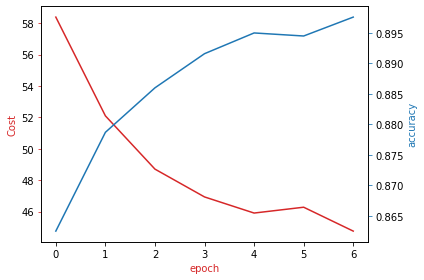

In [15]:
print('VALIDATION')
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_val, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accur_val, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

In [ ]:
train_data[0]

In [ ]:
a[0]

In [ ]:
train